# Artificial Intelligence I: Introduction to Data Science and Machine Learning
# Chapter 2: Data Science Introduction

### Veri Kümesi

2015-2016 NHANES (Ulusal Sağlık ve Beslenme Araştırması) anketine dayalı bir veri kümesi kullanıyoruz. Bu veri kümesi, Kaggle platformundan temin edilmiştir. Amacımız, farklı yaş ve cinsiyet gruplarındaki Beden Kitle İndeksi (BMI) verilerini toplamak ve karşılaştırmak için tanımlayıcı ve tanısal analizler yapmaktır.

Veri seti toplamda 28 sütun ve 5735 satırdan oluşmaktadır. Analiz için belirli önemli sütunları seçtik.

kaynak: https://www.kaggle.com/datasets/ramendrapandey/nhanes-2015-2016

Sütunların kısa açıklamaları:

- SEQN: Yanıtlayıcı sıra numarası
- SMQ020: Sigara içme durumu
- RIAGENDR: Cinsiyet
- RIDAGEYR: Yaş (yıl)
- DMDEDUC2: Eğitim seviyesi
- BMXWT: Ağırlık (kg)
- BMXHT: Boy (cm)
- BMXBMI: Beden Kitle İndeksi (BMI)

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

file="nhanes.csv"
df=pd.read_csv(file)

In [2]:
df.head() # Veri setindeki ilk 5 satır

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [3]:
# Veri setinin boyutu
df.shape

(5735, 28)

In [4]:
# Önemli sütunlar seçilmiş veri seti
isolated_df= df.loc[:,('SEQN','SMQ020', 'RIAGENDR', 'RIDAGEYR','DMDEDUC2','BMXWT', 'BMXHT', 'BMXBMI')]
isolated_df.head()

,SEQN,SMQ020,RIAGENDR,RIDAGEYR,DMDEDUC2,BMXWT,BMXHT,BMXBMI
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3


In [5]:
# Veri seti bilgileri
isolated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   SMQ020    5735 non-null   int64  
 2   RIAGENDR  5735 non-null   int64  
 3   RIDAGEYR  5735 non-null   int64  
 4   DMDEDUC2  5474 non-null   float64
 5   BMXWT     5666 non-null   float64
 6   BMXHT     5673 non-null   float64
 7   BMXBMI    5662 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 358.6 KB


In [6]:
# Sütun adları güncellenmiştir
isolated_df.columns = ['seqn','smoking','gender', 'age','education','weight','height','bmi']

In [7]:
isolated_df.head()

,seqn,smoking,gender,age,education,weight,height,bmi
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3


In [8]:
isolated_df.shape

(5735, 8)

##### Sonuç: 5735 satır ve 8 sütundan oluşan bir veri seti elde edilmiştir. Veri setinde kategorik verileri içeren 3 sütun ve sayısal verileri içeren 4 sütun bulunmaktadır.
- Kategorik: smoking, gender, education
- Sayısal: age, weight, height, bmi

### Veri Temizleme İşlemleri

- Veri setindeki tekrarlanan veya gereksiz verileri tespit edin.
- Boş veya eksik değerleri denetleyerek veri bütünlüğünü sağlayın.
- Aykırı değerleri belirleyerek veri setinin tutarlılığını sağlayın.

In [9]:
dup_row = isolated_df[isolated_df.duplicated()] # tekrarlayan verileri çekiyoruz
dup_row 

,seqn,smoking,gender,age,education,weight,height,bmi


In [10]:
isolated_df.drop(columns = 'seqn', inplace = True)
isolated_df.head()

,smoking,gender,age,education,weight,height,bmi
0,1,1,62,5.0,94.8,184.5,27.8
1,1,1,53,3.0,90.4,171.4,30.8
2,1,1,78,3.0,83.4,170.1,28.8
3,2,2,56,5.0,109.8,160.9,42.4
4,2,2,42,4.0,55.2,164.9,20.3


In [11]:
# Boş veya eksik değerler
isolated_df.isnull().sum()

smoking        0
gender         0
age            0
education    261
weight        69
height        62
bmi           73
dtype: int64

Eğitim, ağırlık, boy ve vücut kitle indeksinde eksik değerler bulunmaktadır. Ancak eğitim sürecini etkilememesi adına, bu eksik değerleri göz ardı etmeyi tercih ediyorum. Eksik değerleri doldurmak, gerçek verilere yanlış yönlendirici etki yapabilir. Ayrıca, eksik değerlerin sayısı veri kümesiyle karşılaştırıldığında oldukça küçüktür (>5000 satır). Bu nedenle, ağırlık, boy ve vücut kitle indeksi için eksik değerleri dikkate almamayı planlıyorum.
Eğer doldurmak istersek:

- Eğitim sütununu ortalama ile doldurma
    - df['education'].fillna(df['education'].mean(), inplace=True)

- Ağırlık, boy ve vücut kitle indeksi sütunlarını medyan ile doldurma
    - df['weight'].fillna(df['weight'].median(), inplace=True)
    - df['height'].fillna(df['height'].median(), inplace=True)
    - df['bmi'].fillna(df['bmi'].median(), inplace=True)

In [12]:
isolated_df.shape # eksik değerleri çıkartmadan önce veri kümesi

(5735, 7)

In [13]:
isolated_df.dropna(inplace=True) # eksik değerleri çıkarıyoruz
isolated_df.shape

(5406, 7)

- Aykırı Değerleri Bulma ve İşleme:

Analiz kapsamında üç sayısal değişken üzerinde odaklanacağım: kilo, boy ve vücut kitle indeksi (VKİ). İlk olarak, bu sütunlardaki aykırı değerleri belirlemek için histogram ve box plot görselleştirmelerini kullanacağım. Tanımlandıktan sonra, bu aykırı değerleri uygun şekilde işleyeceğim.

In [14]:
# Sayısal verilerin tanımlayıcı analizi
numerical = ['age','weight','height','bmi']
isolated_df[numerical].describe()

,age,weight,height,bmi
count,5406.000000,5406.000000,5406.000000,5406.000000
mean,49.390122,81.715594,166.055679,29.541861
std,17.640915,21.775173,10.107149,7.076574
min,20.000000,32.400000,129.700000,14.500000
25%,34.000000,66.300000,158.600000,24.500000
50%,49.000000,78.500000,165.900000,28.500000
75%,64.000000,93.200000,173.400000,33.200000
max,80.000000,198.900000,202.700000,67.300000


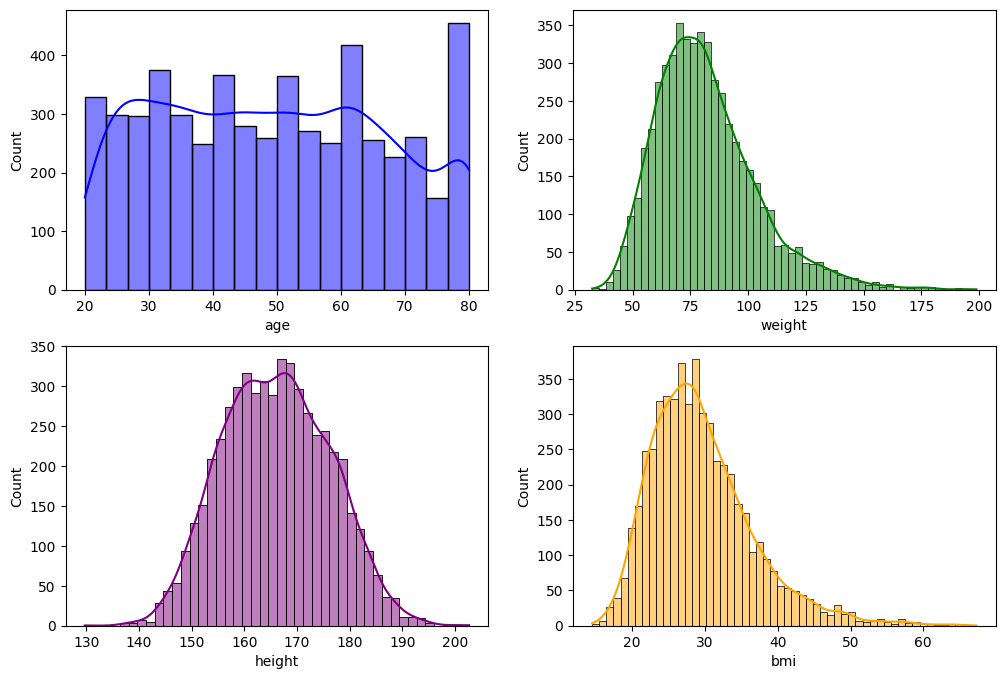

In [15]:
# Sayısal değişken için histogram oluşturma
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
      
sns.histplot(data=isolated_df, x="age", kde=True, color="blue", ax=axs[0,0])  
sns.histplot(data=isolated_df, x="weight", kde=True, color="green", ax=axs[0,1])  
sns.histplot(data=isolated_df, x="height", kde=True, color="purple", ax=axs[1,0])  
sns.histplot(data=isolated_df, x="bmi", kde=True, color="orange", ax=axs[1,1])  

plt.show()


Histogramlardan boyun normal bir dağılım eğrisine sahip olduğunu, ağırlık ve vücut kitle indeksinin ise biraz sağa çarpık bir dağılıma sahip olduğunu gözlemliyorum.

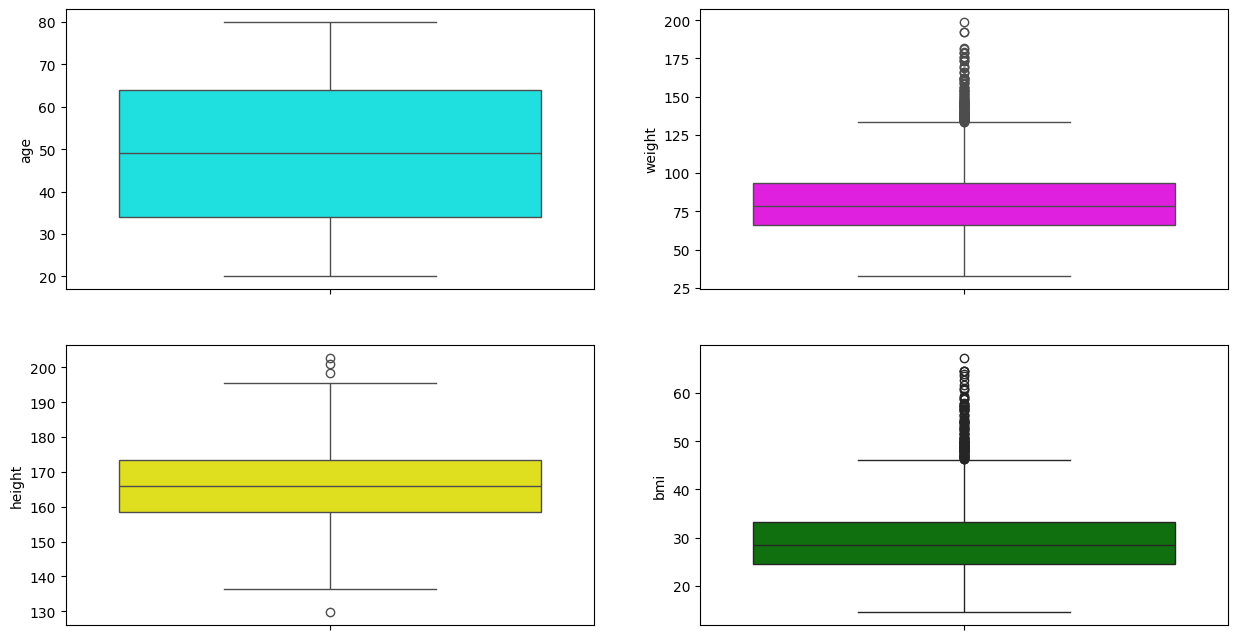

In [16]:
# Sayısal değerin dağılımını gözlemlemek için kutu grafiği oluşturma
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
sns.boxplot(isolated_df['age'], ax=axs[0, 0], color="cyan")  
sns.boxplot(isolated_df['weight'], ax=axs[0, 1], color="magenta")
sns.boxplot(isolated_df['height'], ax=axs[1, 0], color="yellow") 
sns.boxplot(isolated_df['bmi'], ax=axs[1, 1], color="green")  

plt.show()

Kutu grafiklerine göre, yaş ve yükseklik değişkenlerinin aykırı değerleri yoktur. Ağırlık ve vücut kitle indeksinin üst değerlerde daha fazla aykırı değerleri var.

In [17]:
# Boy
qh1, qh2, qh3 = np.percentile(isolated_df['height'], [25,50,75])
iqrh = qh3-qh1
minh = qh1 - 1.5*iqrh
maxh = qh3 + 1.5*iqrh

# IQR içerisinde bulunan verileri seçiyoruz
isolated_df = isolated_df[(isolated_df['height'] > minh) & (isolated_df['height'] < maxh)]

In [18]:
# Kilo
qw1, qw2, qw3 = np.percentile(isolated_df['weight'], [25,50,75])
iqrw = qw3-qw1
maxw = qh3 + 1.5*iqrw

# IQR içindeki veriler (veriler sağa çarpık olduğundan yalnızca maksimum ağırlık değerinin altındaki veriler)
isolated_df = isolated_df[isolated_df['weight'] < maxw]

In [19]:
# BMI
qb1, qb2, qb3 = np.percentile(isolated_df['bmi'], [25,50,75])
iqrb = qb3-qb1
maxb = qb3 + 1.5*iqrb

# IQR içindeki veriler (veriler sağa çarpık olduğundan yalnızca maksimum ağırlık değerinin altındaki veriler)
isolated_df = isolated_df[isolated_df['bmi'] < maxb]

In [20]:
isolated_df.shape # Aykırı değerleri çıkardıktan sonra veriler

(5252, 7)

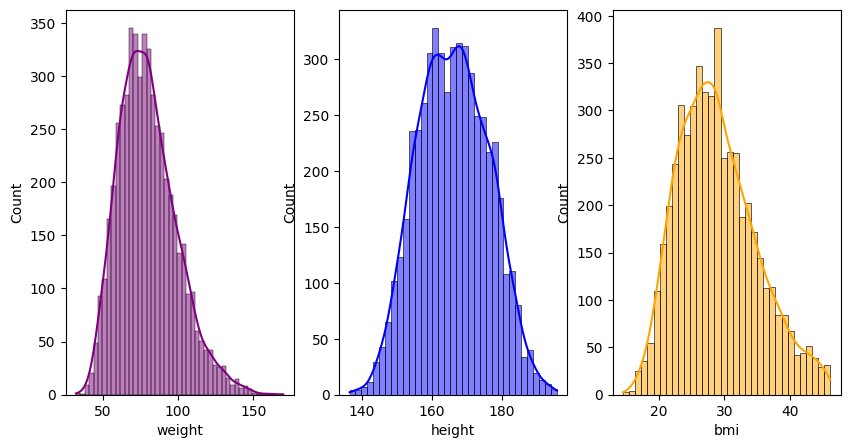

In [21]:
# Histogramı kullanarak aykırı değerleri çıkardıktan sonra dağılımı kontrol edin
fig, axs = plt.subplots(1,3, figsize=(10, 5))
      
sns.histplot(data= isolated_df, x="weight", kde=True, color="purple", ax=axs[0])
sns.histplot(data= isolated_df, x="height", kde=True, color="blue", ax=axs[1])
sns.histplot(data= isolated_df, x="bmi", kde=True, color="orange", ax=axs[2])

plt.show()

Sayısal değerler aykırı değerlerden çıkarıldıktan sonra sonuç normal dağılıma sahip verileri oluşturmuştur.

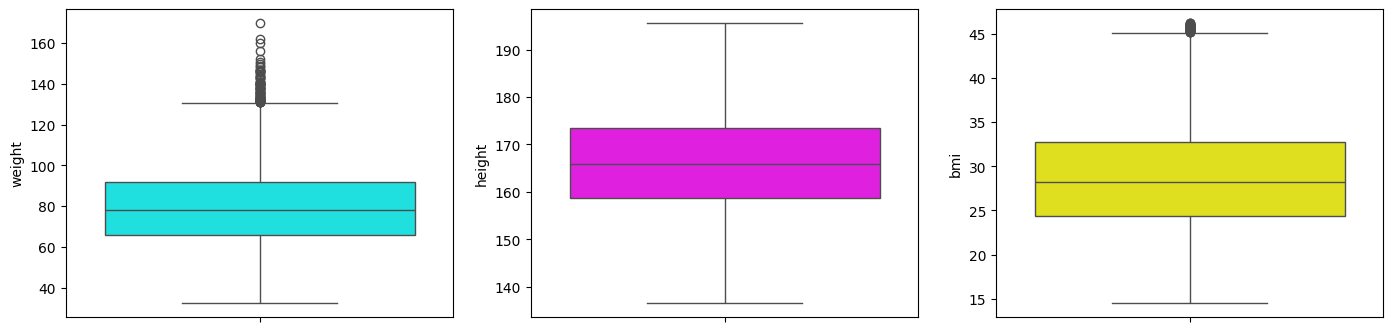

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(17, 4))

sns.boxplot(isolated_df['weight'], ax=axs[0], color="cyan")  
sns.boxplot(isolated_df['height'], ax=axs[1], color="magenta")  
sns.boxplot(isolated_df['bmi'], ax=axs[2], color="yellow")  

plt.show()

### Feature Engineering
- Kategorik veriler için tek bir One Hot Encoding
- Pairplot özellikleri

##### Kategorik veriler için One Hot Encoding
Kategorik veriler int veya float türünde olduğundan, kodlamayı kolaylaştırmak için bunları nesne veri türüne çeviriyoruz.

In [23]:
# Sigara içme durumu
isolated_df['smoking'] = isolated_df['smoking'].replace({1: 'Evet', 2: 'Hayır', 7: np.nan, 9: np.nan})

# Cinsiyet
isolated_df['gender'] = isolated_df['gender'].replace({1: 'Erkek', 2: 'Kadın'})

# Eğitim durumu
isolated_df['education'] = isolated_df['education'].replace({1: '<9. sınıf', 2: '9-11. sınıf',
                                                             3: 'Lise', 4: '2 Yıllık Üniversite',
                                                             5: 'Üniversite (4 Yıllık)', 7: 'Yüksek Lisans',
                                                             8: 'Doktora'})

In [24]:
# Kategorik veriyi çekiyoruz
categorical = isolated_df[['smoking','gender','education']]
categorical.head() 

,smoking,gender,education
0,Evet,Erkek,Üniversite (4 Yıllık)
1,Evet,Erkek,Lise
2,Evet,Erkek,Lise
3,Hayır,Kadın,Üniversite (4 Yıllık)
4,Hayır,Kadın,2 Yıllık Üniversite


In [25]:
# Dummy data oluşturuyoruz
dummy = pd.get_dummies(categorical, dtype=float)
dummy

,smoking_Evet,smoking_Hayır,gender_Erkek,gender_Kadın,education_9.0,education_2 Yıllık Üniversite,education_9-11. sınıf,education_<9. sınıf,education_Lise,education_Üniversite (4 Yıllık)
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5730,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5731,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5732,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5733,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


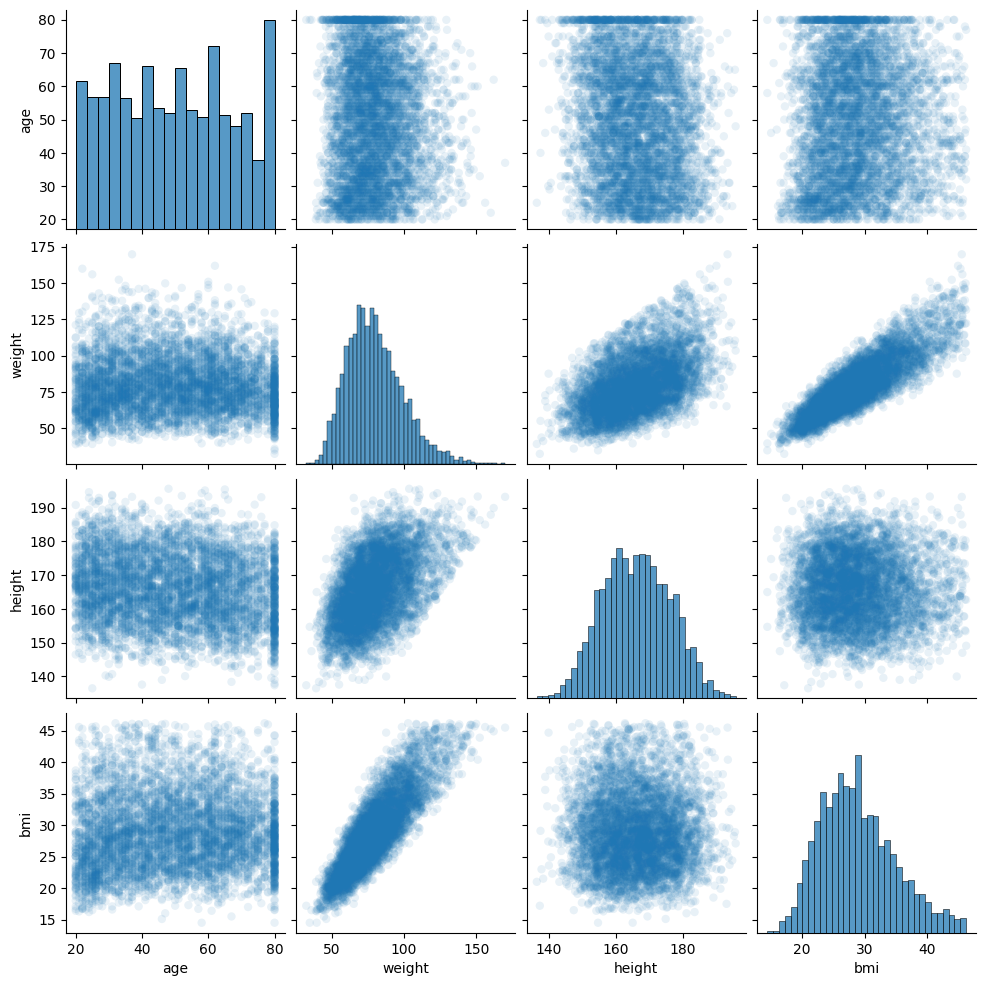

In [26]:
# Pairplot numerik veriler için
sns.pairplot(isolated_df, plot_kws=dict(alpha=.1, edgecolor='none'))

Yukarıdaki pairplot grafiğinden ağırlığın BMI ile pozitif bir korelasyona sahip olduğunu gözlemliyorum. Boy ve kilo da biraz pozitif korelasyona sahiptir.

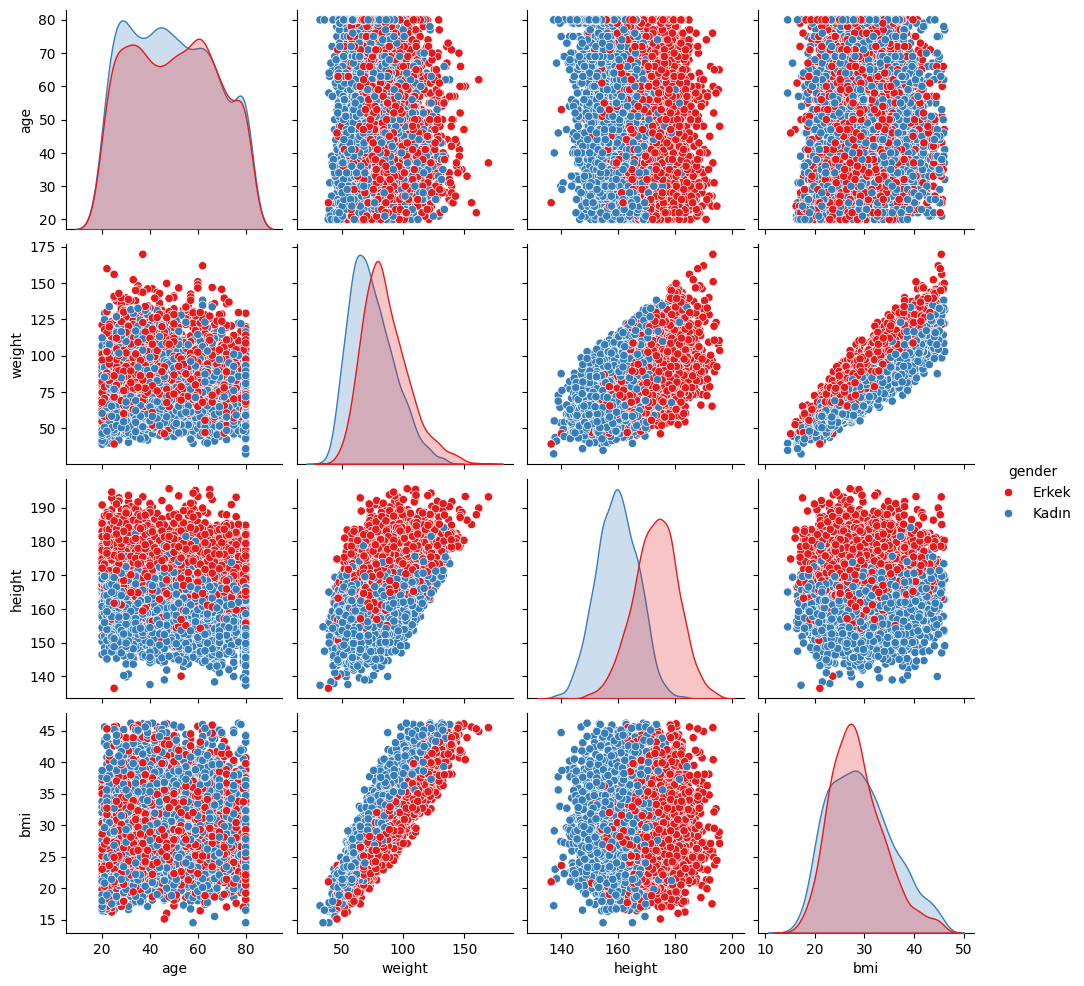

In [27]:
# Cinsiyete göre bölünmüş sayısal değişkenlerin Pairplot
sns.pairplot(isolated_df, hue = 'gender', palette = 'Set1')

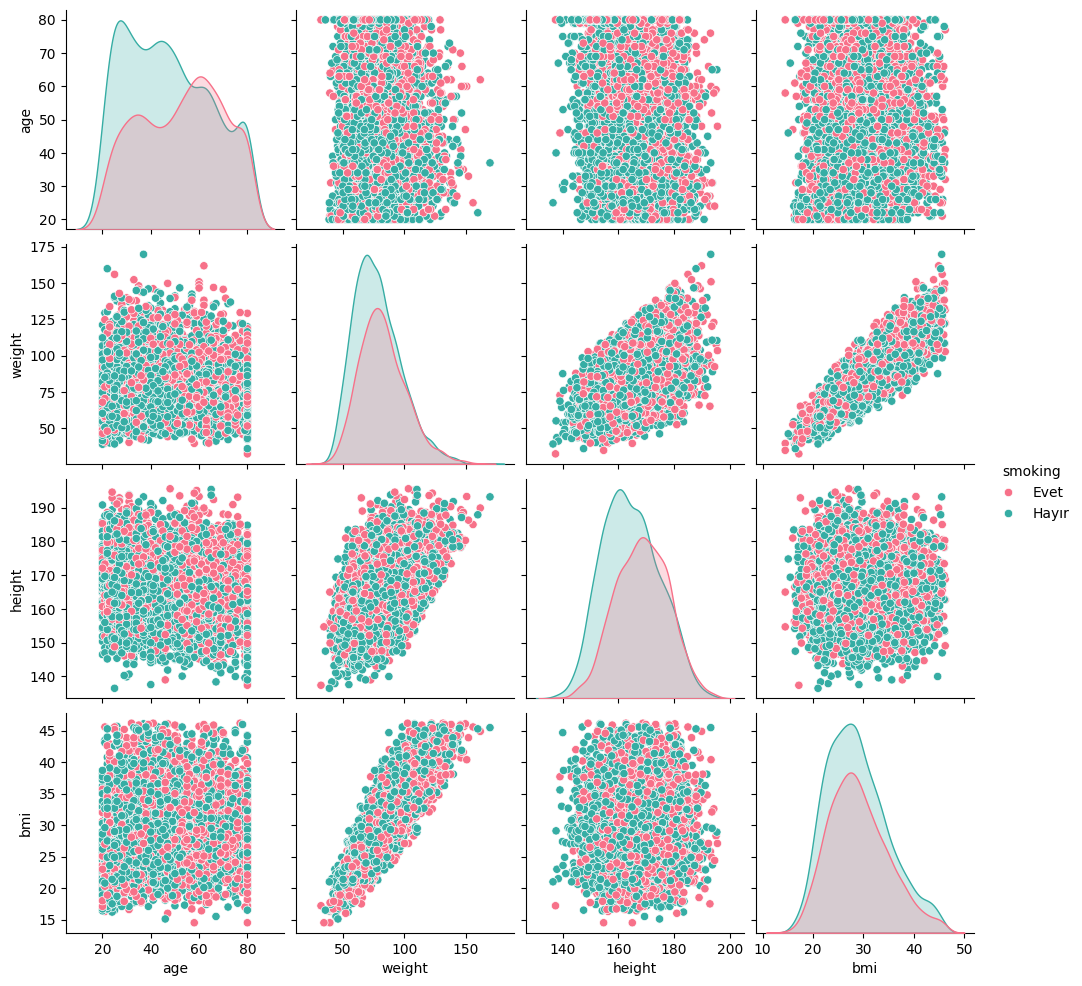

In [28]:
# Sigara içme alışkanlığına bölünen sayısal değişkenlerin çift grafiği
sns.pairplot(isolated_df, hue = 'smoking', palette = 'husl')

- Soru: Bu veri setindeki sigara içme durumu ile vücut kitle indeksi (BMI) arasında bir ilişki var mıdır? Bu ilişki, cinsiyet (gender) ve eğitim seviyesi (education) değişkenlerine göre nasıl farklılık gösterir?

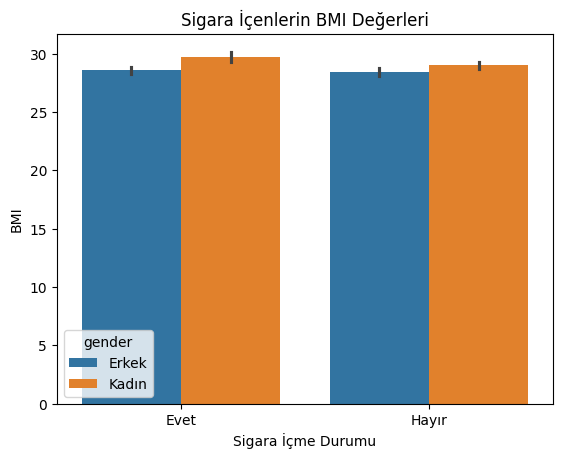

In [29]:
# Sigara içenlerin BMI'larını görselleştirme
sns.barplot(x='smoking', y='bmi', hue='gender', data=isolated_df)
plt.title('Sigara İçenlerin BMI Değerleri')
plt.xlabel('Sigara İçme Durumu')
plt.ylabel('BMI')
plt.show()

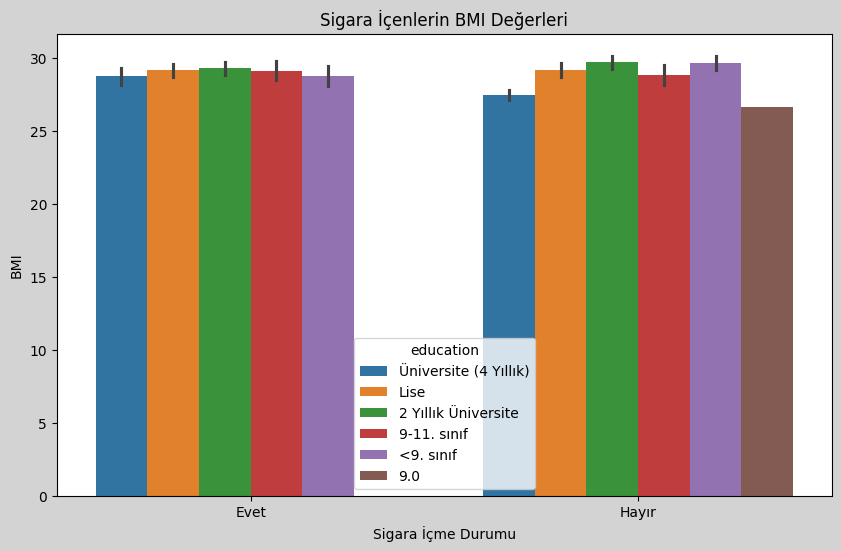

In [30]:
plt.figure(figsize=(10, 6), facecolor='lightgrey')

# Sigara içenlerin BMI'larını eğitim seviyesine göre görselleştirme
sns.barplot(x='smoking', y='bmi', hue='education', data=isolated_df)
plt.title('Sigara İçenlerin BMI Değerleri')
plt.xlabel('Sigara İçme Durumu')
plt.ylabel('BMI')
plt.show()
